<a href="https://colab.research.google.com/github/AaronRM9416/Core-Classwork/blob/main/Project_2_week_4ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 2 

Aaron Musselwhite


In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector, make_column_transformer              ##imports
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')

x-deleted unnecessary columns

x-deleted duplicate rows

x-identified and addressed missing values 

x-identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats)

x-produced univariate visuals for the target and all features

x-identified outliers

x-clearly commented all of your cleaning steps and described any decisions you made  

In [2]:
games= pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRJiyV_o3XPU0pvlMVCM8JrlpXl2hcP1hezOnFBGLQWZq3G0COBwVyOuakBhv31Lt9cgU18RSyBQpWp/pub?output=csv')
games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df= games.copy()

# **Exploration and Cleaning**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [5]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [6]:
df.duplicated().any()

False

In [7]:
df.nunique()

Name               11562
Platform              31
Year_of_Release       39
Genre                 12
Publisher            581
NA_Sales             402
EU_Sales             307
JP_Sales             244
Other_Sales          155
Global_Sales         629
Critic_Score          82
Critic_Count         106
User_Score            95
User_Count           888
Developer           1696
Rating                 8
dtype: int64

In [8]:
df =df.drop(columns=['Year_of_Release','Genre','User_Count','Developer','Critic_Count','Rating','Other_Sales'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16717 non-null  object 
 1   Platform      16719 non-null  object 
 2   Publisher     16665 non-null  object 
 3   NA_Sales      16719 non-null  float64
 4   EU_Sales      16719 non-null  float64
 5   JP_Sales      16719 non-null  float64
 6   Global_Sales  16719 non-null  float64
 7   Critic_Score  8137 non-null   float64
 8   User_Score    7590 non-null   float64
dtypes: float64(6), object(3)
memory usage: 1.1+ MB


In [10]:
df.value_counts('Name')

Name
Need for Speed: Most Wanted                12
FIFA 14                                     9
LEGO Marvel Super Heroes                    9
Ratatouille                                 9
Madden NFL 07                               9
                                           ..
Import Tuner Challenge (American sales)     1
Impossible Creatures                        1
In Cold Blood                               1
In The Groove                               1
¡Shin Chan Flipa en colores!                1
Length: 11562, dtype: int64

In [12]:
df.value_counts('Platform')

Platform
PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
dtype: int64

In [13]:
df.value_counts('Publisher')

Publisher
Electronic Arts                 1356
Activision                       985
Namco Bandai Games               939
Ubisoft                          933
Konami Digital Entertainment     834
                                ... 
Seventh Chord                      1
New                                1
Simon & Schuster Interactive       1
ITT Family Games                   1
SCS Software                       1
Length: 581, dtype: int64

# Early Visuals

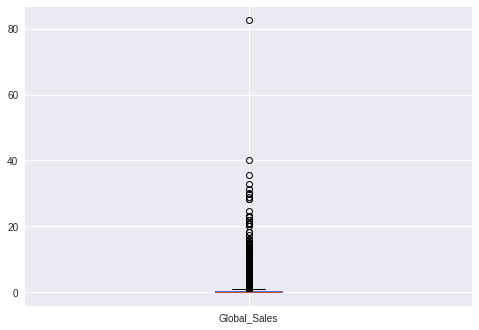

In [57]:
df.boxplot(column ='Global_Sales')

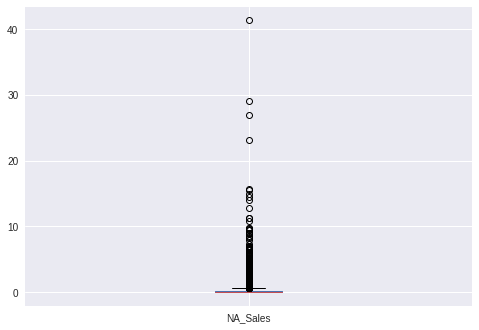

In [59]:
df.boxplot(column ='NA_Sales')

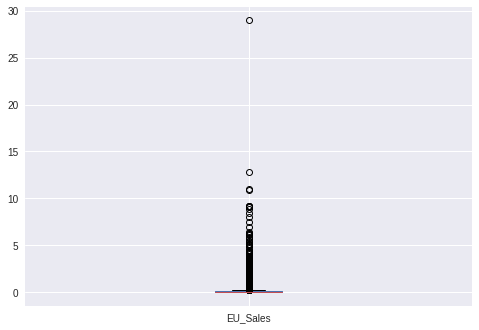

In [60]:
df.boxplot(column ='EU_Sales')

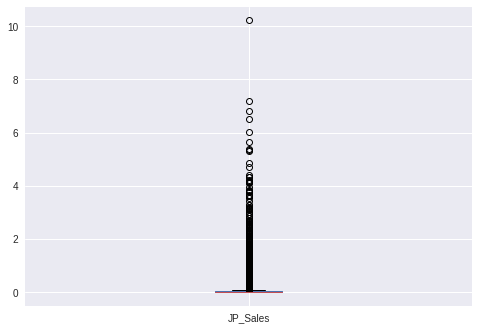

In [61]:
df.boxplot(column ='JP_Sales')

# Data Split and imputing

In [14]:
X = df.drop(columns=['Platform'])
y = df['Platform']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
num_select = make_column_selector(dtype_include='number')
cat_select = make_column_selector(dtype_include='object')

In [19]:
num_column = num_select(X_train)
cat_column = cat_select(X_train)
print('numeric columns are', num_column)
print('categorical columns are', cat_column)

numeric columns are ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales', 'Critic_Score', 'User_Score']
categorical columns are ['Name', 'Publisher']


In [20]:
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

In [26]:
num_tup = (mean_imputer, num_select)
cat_tup = (freq_imputer, cat_select)
col_transform = make_column_transformer(num_tup, cat_tup, remainder='passthrough')
col_transform

ColumnTransformer(remainder='passthrough',
                  transformers=[('simpleimputer-1', SimpleImputer(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fcf135075d0>),
                                ('simpleimputer-2',
                                 SimpleImputer(strategy='most_frequent'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fcf13507850>)])

In [28]:
col_transform.fit(X_train)
X_train_imputed = col_transform.transform(X_train)
X_test_imputed = col_transform.transform(X_test) 
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_train_imputed.isna().sum()

Name            0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Global_Sales    0
Critic_Score    0
User_Score      0
dtype: int64

In [34]:
Stan_Scale = StandardScaler()

In [38]:
num_pipe = make_pipeline(mean_imputer, Stan_Scale)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [40]:
OHE = OneHotEncoder(handle_unknown='ignore')

In [41]:
nom_pipe = make_pipeline(freq_imputer, OHE)
nom_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder', OneHotEncoder(handle_unknown='ignore'))])

# Visuals

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 <a list of 31 Text major ticklabel objects>)

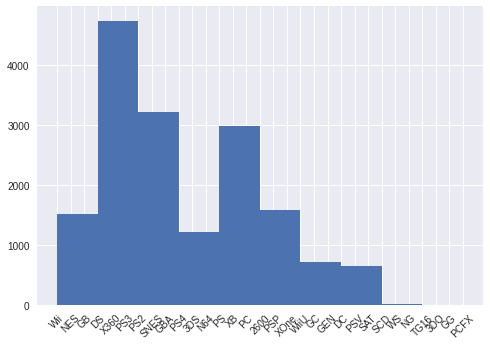

In [43]:
plt.style.use('seaborn')
df['Platform'].hist()
plt.xticks(rotation = 45)


(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text major ticklabel objects>)

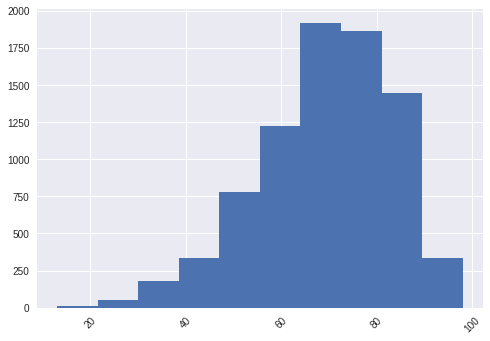

In [47]:
plt.style.use('seaborn')
df['Critic_Score'].hist()
plt.xticks(rotation = 45)

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 8 Text major ticklabel objects>)

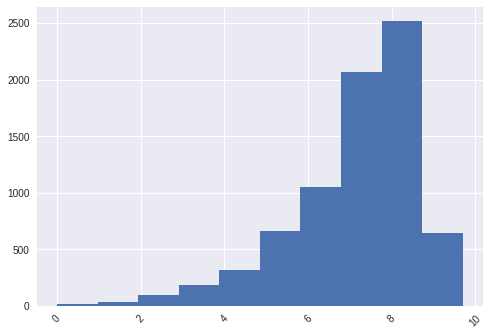

In [48]:
plt.style.use('seaborn')
df['User_Score'].hist()
plt.xticks(rotation = 45)